# Importing and calling data files


In [110]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import os,sys
import fit_schechter as fs
import glob
import scipy
from astropy.cosmology import Planck15 as P15
from astropy import units as u
from astropy import constants as const
from scipy import interpolate
from scipy.optimize import minimize, differential_evolution, basinhopping
import run_LF as LF


plt.style.use(['default','seaborn-colorblind','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'



In [111]:
# Used to reload run_LF.py file with all defined functions
%reload_ext autoreload
%autoreload 2

# Methodology
## Defining function to call files and plotting functions


In [112]:
#Call UV LF files by calling file name at specific z value 
LFz_tab = np.array([float(f.split('LF_pred_z')[-1].split('.txt')[0]) for f in LF.LFz_files]) 


#Call xHI, EW files
xHI_tab = np.array([float(f.split('xHI=')[-1].split('.txt')[0]) for f in LF.pW_files]) 

#Call EW file with xHI = 0.01 
pW_tab = LF.load_uvf_pandas(LF.pW_files[0]) 

#Get Muv values from EW file as an array to use
Muv_EW = np.array([float(Muv_val) for Muv_val in pW_tab.columns[1:]])

## Defining constants and evaluating equations for given z value. Defining necessary functions for Lya LF

Text(0, 0.5, '$<\\mathrm{L_\\alpha}>$ [erg/s]')

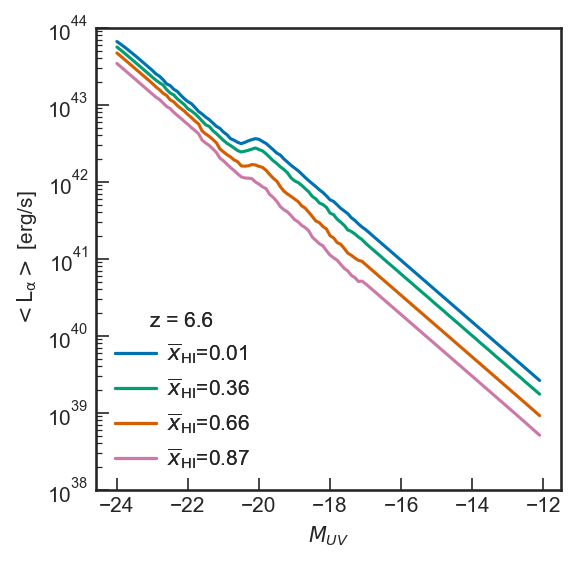

In [5]:
#Plot Muv vs expectation value of lya luminosity
plt.figure(figsize=(4.,4.), dpi=150)
Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.6, xHI_test=0.01)
expec_L = np.trapz((LF.lum_grid*(new_pLya.T)),x=LF.lum_grid)
plt.semilogy(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.01')

Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.6, xHI_test=0.36)
expec_L = np.trapz((LF.lum_grid*(new_pLya.T)),x=LF.lum_grid)
plt.semilogy(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.36')

Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.6, xHI_test=0.66)
expec_L = np.trapz((LF.lum_grid*(new_pLya.T)),x=LF.lum_grid)
plt.semilogy(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.66')

Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.6, xHI_test=0.87)
expec_L = np.trapz((LF.lum_grid*(new_pLya.T)),x=LF.lum_grid)
plt.semilogy(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.87')

#Legends,axes info
leg_zval1 = plt.legend(title ='z = 6.6',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval1)
plt.ylim(1e38,1e44)
plt.xlabel(r'$M_{UV}$')
plt.ylabel(r'$<\mathrm{L_\alpha}>$ [erg/s]')
# plt.savefig('ExpectationLya.pdf', bbox_inches='tight')
# plt.show()


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  This is separate from the ipykernel package so we can avoid doing imports until


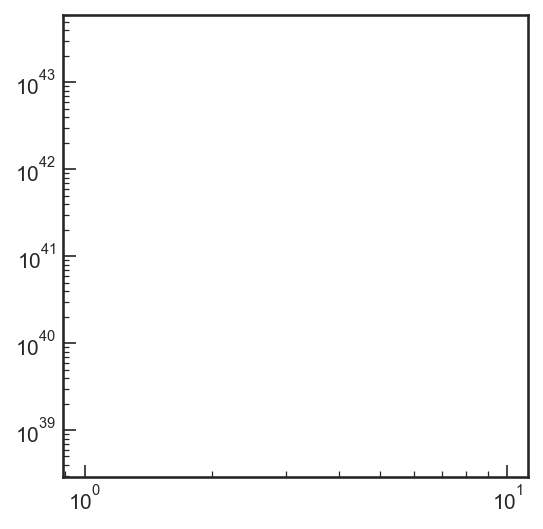

In [6]:
plt.figure(figsize=(4.,4.), dpi=150)
Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=5.7, xHI_test=0.01)
plt.loglog(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.01')
# Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=5.7, xHI_test=0.36)
# plt.loglog(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.01')
# Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=5.7, xHI_test=0.87)
# plt.loglog(Muv_grid,expec_L,label='$\overline{x}_\mathrm{HI}$=0.01')

Text(0, 0.5, '$\\phi(log_{10}(\\mathrm{L_\\alpha}))\\ [Mpc^-3]$')

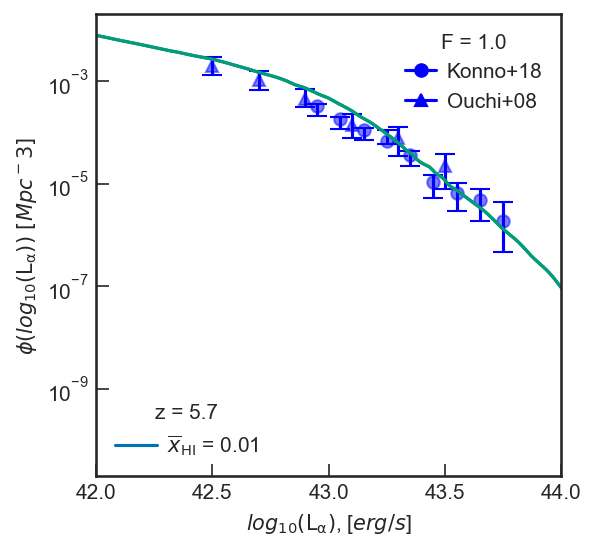

In [113]:
#Calibrated Lya LF

plt.figure(figsize=(4.,4.), dpi=150)
log10_LF_calibrate = LF.make_lya_LF(zval_test = 5.7,xHI_test = 0.01, F = 1., plot=True, log=True)
plt.semilogy(LF.log10_lg, log10_LF_calibrate)

leg_zval1 = plt.legend(title = 'z = 5.7',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval1)
line2 = mlines.Line2D([], [], color='blue', marker='o', label='Konno+18')
line3 = mlines.Line2D([], [], color='blue', marker='^', label='Ouchi+08')

plt.legend(title = 'F = 1.0', handles=[line2,line3], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)
plt.xlim(42,44)
plt.xlabel(r'$log_{10}(\mathrm{L_\alpha})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')
# plt.savefig('CalibratedKonnovsLF.pdf', bbox_inches='tight')
# plt.show()
# plt.savefig('CalibratedKonnovsLFf666.pdf', bbox_inches='tight')
# plt.show()

## Chi-squared minimization to find F at z = 6.6, 7.0, 7.3

In [8]:
def line_model(F, obs_L):
    """
    Evaluate a straight line model at the input Konno luminosity values.
    
    Parameters
    ----------
    F : list, array
        This should be a length-2 array or list containing the 
        parameter values (a, b) for the (slope, intercept).
    new_phi_Li : numeric, list, array
        The coordinate values.
        
    Returns
    -------
    F*new_phi_Li : array
        The computed y values at each input x.
    """
    #Interpolating Konno and lum grid 
    LF_interp2 = interpolate.interp1d(LF.log10_lg, log10_LF_calibrate)
    new_phi_Li = LF_interp2(obs_L)
    
    return F*new_phi_Li


F = np.linspace(0,2, 20) #Start prediction F to be within 0-2 range



In [9]:
# z = 5.7
Ouchi_info5 = LF.ouchi_data_plt(zval_test = 5.7, plot = False, mean = False)
Konno_info5 = LF.konno_data_plt(zval_test = 5.7, plot = False, mean = False)

log_L5 = np.concatenate((Ouchi_info5[0], Konno_info5[0]), axis=None)
ndens5 = np.concatenate((Ouchi_info5[1], Konno_info5[1]), axis=None)
yerror_l5 = np.concatenate((Ouchi_info5[2][0], Konno_info5[2][0]), axis=None)
yerror_u5 = np.concatenate((Ouchi_info5[2][1], Konno_info5[2][1]), axis=None)


[0.66612687]


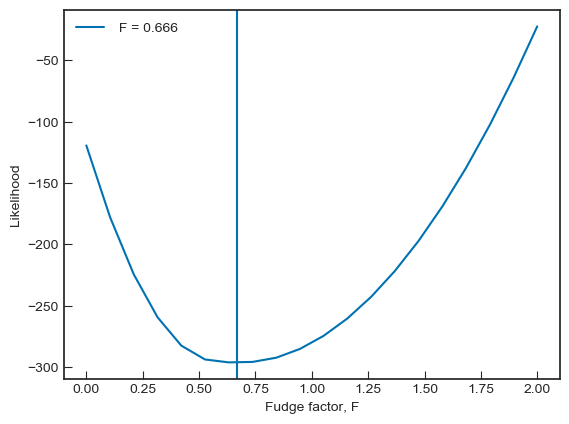

In [10]:
def log_likelihood(theta, x, y, dy_l, dy_u):
    """
    Returns log(likelihood) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    x: list, array-like
        x-values of your data
    y: list, array-like
        y-values of your data
    dy: list, array-like
        Uncertainties on the y-values of your data
    
    Returns
    -------
    ln_like: float
        Natural log of the likelihood function
    """
    F = theta
    
    
#     y_model = LF.xHI_model(xHI_grid_match, obs_L = x, zval= z)
    y_model = line_model(F = theta[:,None], obs_L = x)
    

    #Defining split-likelihood
    #chi2 use split
    A = (np.sqrt(2.*np.pi)*(((dy_u + dy_l)/2.)**2.))**(-1)
    
    likelihood = A * np.exp(-0.5* ((y_model - y)**2.)/(dy_u**2.))

    likelihood2 = A * np.exp(-0.5* ((y_model - y)**2.)/(dy_l**2.))
    
    likelihood[y_model >= y] = likelihood2[y_model >= y]
    ln_like = np.sum(np.log(likelihood),axis=1)

    return -ln_like

F_likelihood = log_likelihood(theta = F, x = log_L5, y = ndens5, dy_l = yerror_l5, dy_u = yerror_u5)

plt.plot(F,F_likelihood)
plt.xlabel('Fudge factor, F')
plt.ylabel('Likelihood')

x0 = 0.6 # starting guess for the optimizer 
result_sq = minimize(log_likelihood, x0=x0,method='BFGS',args=(log_L5,ndens5,yerror_l5,yerror_u5))
best_pars_sq = result_sq.x
label = (' F = %.3f'%best_pars_sq)
print(best_pars_sq)
plt.axvline(best_pars_sq, label = label)
plt.legend()

# Lya LF Plots (z = 5.7, 6.6, 7.0, 7.3)

In [20]:
#xHI values used in LF plots
xHI_LFvalues = np.array([0.01,0.15,0.36,0.66,0.87, 0.95])

Text(0, 0.5, '$\\phi(log_{10}(\\mathrm{L_\\alpha}))\\ [Mpc^-3]$')

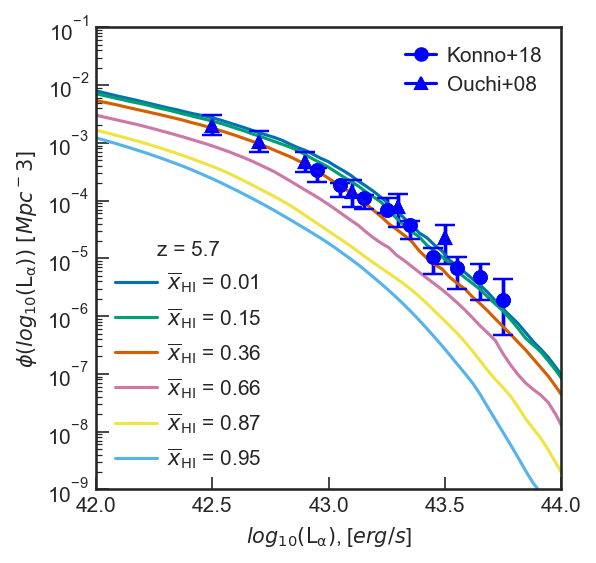

In [27]:
#LF z = 5.7
#Uses Konno,Santos, Ouchi functions

plt.figure(figsize=(4.,4.), dpi=150)

for xHI in xHI_LFvalues:
    log10_LF57 = LF.make_lya_LF(zval_test = 5.7, xHI_test = xHI ,F=0.666, plot=True)


#Legend info
leg_zval1 = plt.legend(title = 'z = 5.7',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval1)
line2 = mlines.Line2D([], [], color='blue', marker='o', label='Konno+18')
line3 = mlines.Line2D([], [], color='blue', marker='^', label='Ouchi+08')
plt.legend(handles=[line2,line3], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)

#Axes limits, labels
plt.xlim(42,44)
plt.ylim(1e-9,1e-1)
plt.xlabel(r'$log_{10}(\mathrm{L_\alpha})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')

#Save Figure
# plt.savefig('KonnovsLF5.7.pdf', bbox_inches='tight')
# plt.show()


Text(0, 0.5, '$\\phi(log_{10}(\\mathrm{L_\\alpha}))\\ [Mpc^-3]$')

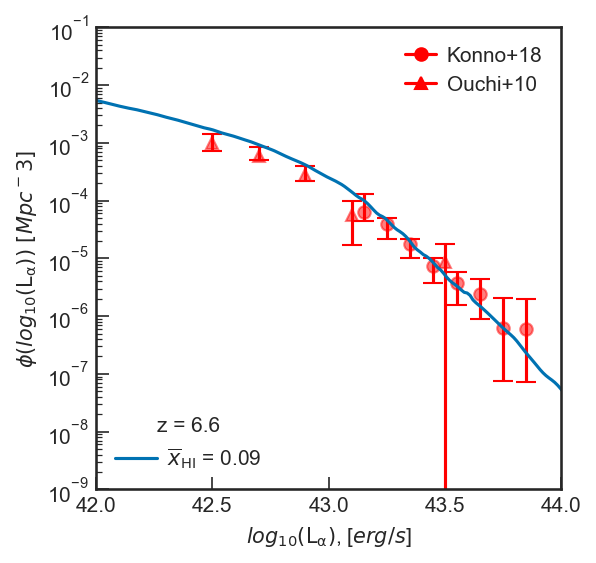

In [114]:
#LF z = 6.6
#Uses Konno,Santos, Ouchi functions

xHIval66 = 0.095
#Nearest neighbor to xHI list
idx66 = (np.abs(LF.xHI_list - xHIval66)).argmin()
xHI_grid_match66 = LF.xHI_list[idx66]


plt.figure(figsize=(4.,4.), dpi=150)

# for xHI in xHI_LFvalues:
log10_LF66 = LF.make_lya_LF(zval_test = 6.6, xHI_test = xHI_grid_match66, F=0.666, plot=True)

#Legend info
leg_zval2 = plt.legend(title = 'z = 6.6',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval2)
line2 = mlines.Line2D([], [], color='red', marker='o', label='Konno+18')
line3 = mlines.Line2D([], [], color='red', marker='^', label='Ouchi+10')

plt.legend(handles=[line2,line3], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)

#Axes limits, labels
plt.xlim(42,44)
plt.ylim(1e-9,1e-1)
plt.xlabel(r'$log_{10}(\mathrm{L_\alpha})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')


#Save Figure
# plt.savefig('KonnovsLF6.6.pdf', bbox_inches='tight')
# plt.show()

Text(0, 0.5, '$\\phi(log_{10}(\\mathrm{L_\\alpha}))\\ [Mpc^-3]$')

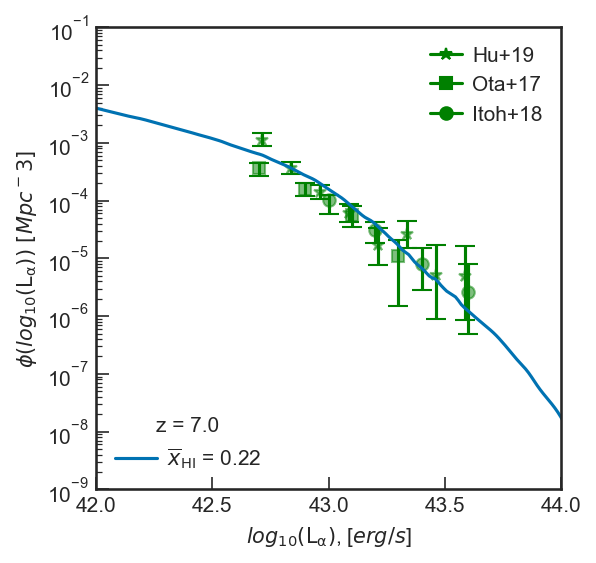

In [115]:
#LF z = 7.0
#Uses Zheng, Ota, Itoh, Hu functions

xHIval70 = 0.202
#Nearest neighbor to xHI list
idx70 = (np.abs(LF.xHI_list - xHIval70)).argmin()
xHI_grid_match70 = LF.xHI_list[idx70]

plt.figure(figsize=(4.,4.), dpi=150)

# for xHI in xHI_LFvalues:
log10_LF70 = LF.make_lya_LF(zval_test = 7.0, xHI_test = xHI_grid_match70 ,F=0.666, plot=True)

# #ACTUAL UPPER AND LOWER POINTS (3Lya_LF_Zheng_z7.0)
# plt.plot(42.71, 2.88e-04, marker = "*")
# plt.plot(42.71, 1.096e-04, marker = "*")
# plt.plot(43.33, 2.455e-05, marker = "*")
# plt.plot(43.33, 1.259e-06, marker = "*")

# plt.plot(43.3, 1.47e-06, marker = "*")
# plt.plot(43.3, 2.07e-05, marker = "*")
# plt.plot(42.7, 2.63e-04, marker = "*")
# plt.plot(42.7, 4.56e-04, marker = "*")

#Legend info
leg_zval1 = plt.legend(title = 'z = 7.0',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval1)
line2 = mlines.Line2D([], [], color='green', marker='*', label='Hu+19')

# line2 = mlines.Line2D([], [], color='green', marker='^', label='Zheng+17')
line3 = mlines.Line2D([], [], color='green', marker='s', label='Ota+17')
line4 = mlines.Line2D([], [], color='green', marker='o', label='Itoh+18')
plt.legend(handles=[line2,line3,line4], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)

#Axes limits, labels
plt.xlim(42,44)
plt.ylim(1e-9,1e-1)
plt.xlabel(r'$log_{10}(\mathrm{L_\alpha})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')

#Save Figure
# plt.savefig('KonnovsLF7.0.pdf', bbox_inches='tight')
# plt.show()


Text(0, 0.5, '$\\phi(log_{10}(\\mathrm{L_\\alpha}))\\ [Mpc^-3]$')

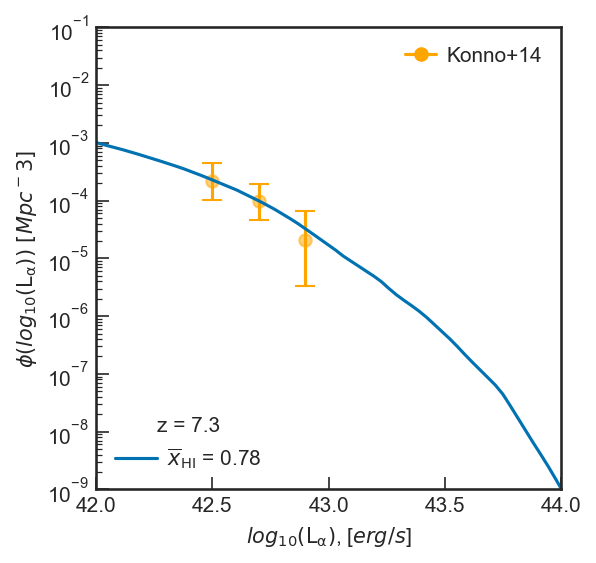

In [98]:
#LF z = 7.3
#Uses Konno, Shibuya functions
xHIval73 = 0.778
#Nearest neighbor to xHI list
idx73 = (np.abs(LF.xHI_list - xHIval73)).argmin()
xHI_grid_match73 = LF.xHI_list[idx73]
plt.figure(figsize=(4.,4.), dpi=150)

# for xHI in xHI_LFvalues:
log10_LF73 = LF.make_lya_LF(zval_test = 7.3,xHI_test = xHI_grid_match73, F=0.666, plot=True, log=True)

#Legend info
leg_zval3 = plt.legend(title = 'z = 7.3',frameon=False, handletextpad=0.5, loc="lower left")
plt.gca().add_artist(leg_zval3)
line2 = mlines.Line2D([], [], color='orange', marker='o', label='Konno+14')
# line3 = mlines.Line2D([], [], color='orange', marker='p', label='Shibuya+12')
plt.legend(handles=[line2], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)

#Axes limits, labels
plt.xlim(42,44)
plt.ylim(1e-9,1e-1)

plt.xlabel(r'$log_{10}(\mathrm{L_\alpha})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')

#Save Figure
# plt.savefig('KonnovsLF7.3.pdf', bbox_inches='tight')
# plt.show()

# Fitting Schechter parameters to LF

100%|██████████| 1000/1000 [00:09<00:00, 107.84it/s]


array([-2.02001737, 43.14138315, -3.87785547])

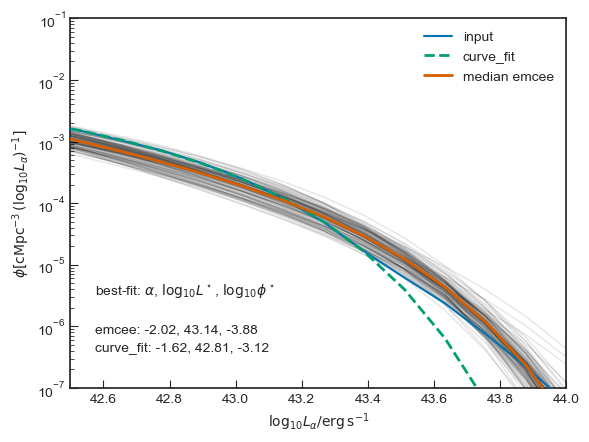

In [37]:
def schechter_fit(zval_test, xHI_test, plot=False):
    #Call LF function
    log10_LF = make_lya_LF(zval_test, xHI_test, F=0.666, plot=False)
    
    #Emcee Information
    # Run emcee to get posterior samples
    sampler = fs.fit_schechter_emcee(log10_lg, log10_LF, logL_min=41., logL_max=44.)
    
    if plot==True:
        plt.figure()
        fs.plot_emcee_draws(sampler, log10_lg, log10_LF, xlim=(42.5, 44.5))
#         plt.savefig('emceeDrawsFit.pdf', bbox_inches='tight')
#         plt.show()
    medians = fs.get_emcee_medians(sampler)
    return medians
schechter_fit(zval_test=5.7, xHI_test=0.01, plot=True)






[-2.91439824 43.35213711 -4.53667684] [0.1603683  0.05660449 0.20016962]


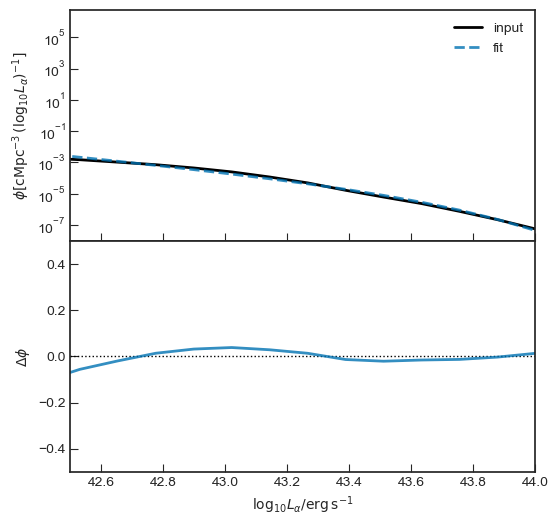

In [38]:
#Call LF function
log10_LF = LF.make_lya_LF(zval_test=5.7, xHI_test=0.01, F=0.666, plot=False)


#Schechter Information
# find the fitted params and their errors
p_scipy, err = fs.fit_schechter_scipy(LF.log10_lg, LF.log10_LF, logL_min=42.5, logL_max=44.5)
print(p_scipy, err)

# Plot
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True)

# Plot the input LF
ax[0].semilogy(LF.log10_lg, LF.log10_LF, c='k', lw=2, label='input')

# Plot the model LF
ax[0].plot(LF.log10_lg, fs.schechter_logL(LF.log10_lg, *p_scipy), ls='dashed', lw=2, alpha=0.8, label='fit')

# Plot the fractional difference between the model and the data
ax[1].axhline(0, lw=1, ls='dotted', c='k')
ax[1].plot(log10_lg, (fs.ln_schechter_logL(LF.log10_lg, *p_scipy)-np.log(LF.log10_LF))/np.log(LF.log10_LF), lw=2, alpha=0.8)


ax[0].legend()

ax[1].set_xlabel(r'$\log_{10} L_\alpha/{\mathrm{erg \, s}^{-1}}$')
ax[0].set_ylabel(r'$\phi[\mathrm{cMpc}^{-3}\, (\log_{10} L_\alpha)^{-1}]$')
ax[1].set_ylabel(r'$\Delta \phi$')
ax[1].set_ylim(-0.5,0.5)
ax[1].set_xlim(42.5,44)

fig.subplots_adjust(hspace=0)
plt.savefig('scipyCurveFit.pdf', bbox_inches='tight')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]/Applications/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:08<00:00, 119.22it/s]


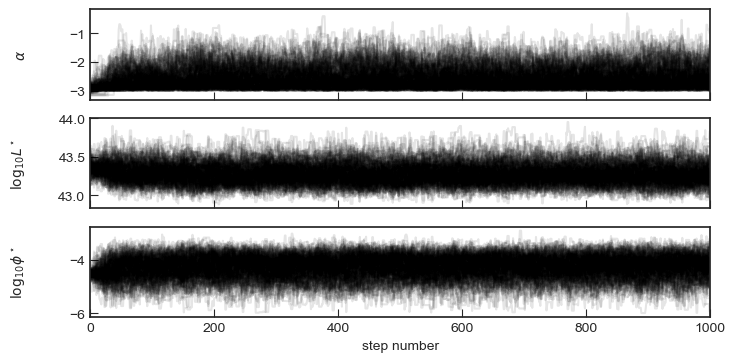

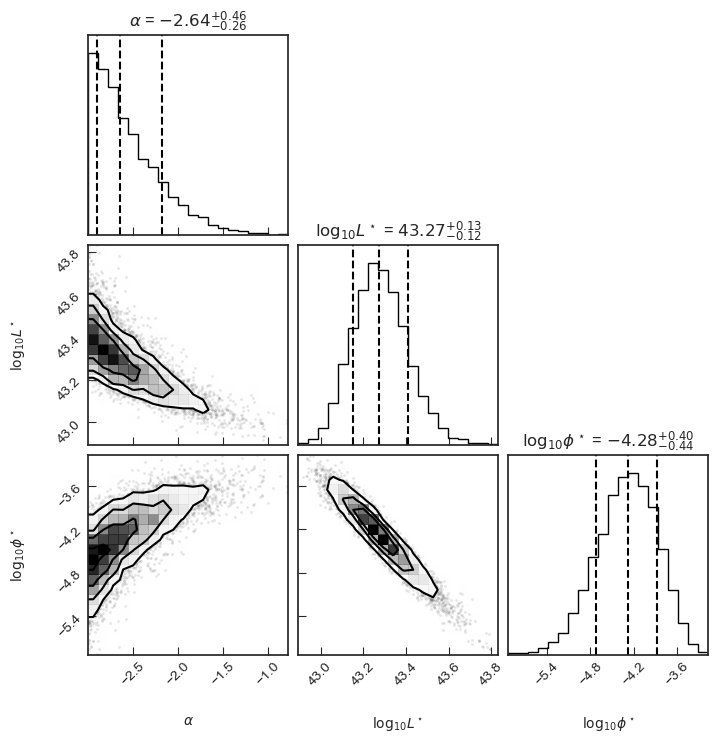

-2.64	0.26	0.46	43.27	0.12	0.13	-4.28	0.44	0.40
[-2.64194057 43.27431759 -4.27536881]


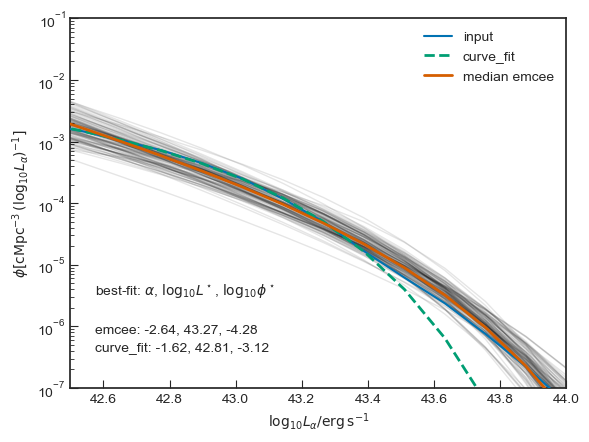

In [39]:
#Emcee Information
# Run emcee to get posterior samples
sampler = fs.fit_schechter_emcee(LF.log10_lg, LF.log10_LF, logL_min=42.5, logL_max=44.5)
# Plot posterior chains and corner plot
fs.plot_emcee(sampler)
plt.savefig('emceeFit.pdf', bbox_inches='tight')
plt.show()


plt.figure()
fs.plot_emcee_draws(sampler, LF.log10_lg, LF.log10_LF, xlim=(42.5, 44.5))
# plt.savefig('emceeDrawsFit.pdf', bbox_inches='tight')
# plt.show()
print(fs.get_emcee_params(sampler))
medians = fs.get_emcee_medians(sampler)
print(medians)

In [27]:
Schechter_params = {} #Schecter param. dictionary
zval_test = LF.LFz_tab
xHI_test = LF.xHI_list
print(zval_test)
print(xHI_test)
for zval in zval_test:
    for xHI in xHI_test:
        medians = schechter_fit(zval_test=zval, xHI_test=xHI, plot=True)
        Schechter_params[(zval,xHI)] = medians 
Schechter_params

[10.   5.   5.5  5.7  6.   6.5  6.6  6.8  7.   7.3  7.5  7.9  8.   8.5
  9.   9.5]
[0.01 0.02 0.05 0.07 0.09 0.12 0.15 0.18 0.22 0.25 0.29 0.32 0.36 0.39
 0.42 0.45 0.49 0.52 0.55 0.58 0.61 0.64 0.66 0.69 0.72 0.74 0.76 0.78
 0.8  0.82 0.84 0.86 0.87 0.89 0.9  0.91 0.92 0.93 0.94 0.95]


NameError: name 'schechter_fit' is not defined

In [40]:
np.save('Schechter_params.npy',Schechter_params)
np.load('Schechter_params.npy',allow_pickle=True)

array({}, dtype=object)

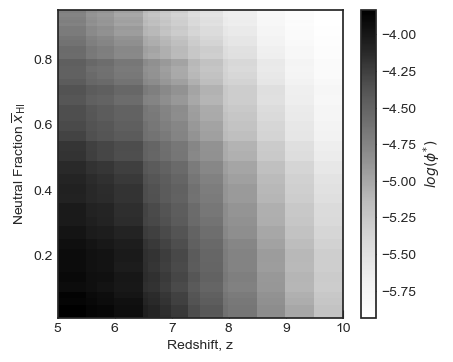

/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=24,32 m=640 fp=0.138972 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


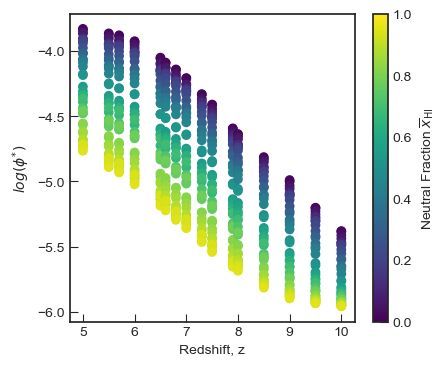

In [446]:
import itertools as it
def dict_to_2Dplot(p_dict, p_index=0, p_name=r'$log(\phi^{*})$', cmap='viridis'):
    """
    Input a dictionary with keys (z, xHI) with values p = (alpha, logLstar, logPhistar)
    Plot p(z, xHI) and xHI(z, p) -- requires interpolating.
    """
    keys    = np.array([[k[0], k[1]] for k in p_dict.keys()])
    z_all   = keys[:,0]
    xHI_all = keys[:,1]
    
    # find unique z and xHI values
    z_array   = np.unique(z_all)    
    xHI_array = np.unique(xHI_all)
    
    # Get all the values of the parameter (at index) from the dictionary
    p_values = np.array([v for v in p_dict.values()])[:,p_index]
    
    # Create a grid of the parameter values
    p_array   = np.linspace(p_values.min(), p_values.max(), 100)   
    
    # -------------------------
    # Fill the 2D array of parameter values from the dictionary and plot
    p_image = np.zeros((len(z_array),len(xHI_array)))
    
    for (i,z), (j,xHI) in it.product(enumerate(z_array), enumerate(xHI_array)):
        p_image[i, j] = p_dict[(z,xHI)][p_index]        
    
    plt.figure(figsize=(4.6,4))
    plt.pcolormesh(z_array, xHI_array, p_image.T)
    plt.colorbar(label=p_name)
    plt.xlabel('Redshift, z')
#     plt.ylabel('Neutral Fraction $\overline{x}_\mathrm{HI}$')
#     plt.savefig('Schechter_zxHIPhistar.pdf', bbox_inches='tight')
#     plt.show()
    # -------------------------
    # We have parameter(z, xHI), want to get xHI(z, p) so we need to interpolate
    # from our current list of all z values, all p values and all xHI values to
    # to the grids we want to plot on
    xHI_interp = scipy.interpolate.interp2d(z_all, p_values, xHI_all, 
                                            kind='linear', fill_value=np.nan)
    
    # interpolate onto the correct z and p grid
    new_xHI = xHI_interp(z_array, p_array)
    
    # correct interpolated values which go to xHI=0 when they shouldn't be
    new_xHI[new_xHI == 0.] = np.nan
    
    plt.figure(figsize=(4.6,4))
    plt.scatter(z_all, p_values, c=xHI_all, cmap=cmap, vmin=0, vmax=1.)
    plt.colorbar(label='Neutral Fraction $\overline{x}_\mathrm{HI}$')
    plt.xlabel('Redshift, z')
    plt.ylabel(p_name) 
#     plt.savefig('Schechter_zPhistar.pdf', bbox_inches='tight')
#     plt.show()
    return
dict_to_2Dplot(p_dict=Schechter_params, p_index=2)

# Luminosity density

In [34]:
#Call LD columns
LD_tab = LF.load_uvf_pandas(LF.LD_files[0])
print(LD_tab.groupby(['ref']))

LDyerr_l = LD_tab['log(LD)'] - LD_tab['err_l']
LDyerr_u = LD_tab['err_u'] - LD_tab['log(LD)']
LDyerror = np.array([LDyerr_l,LDyerr_u])
LDyerror_mean = np.mean(LDyerror,axis=0)



In [37]:
def LD_info(zval_test,xHI_test):
    lum_lower = 10**42.4 #lower limit of luminosity grid
    phiL = LF.make_lya_LF(zval_test,xHI_test, F=0.666, plot=False, log=False)
    LD = np.trapz((LF.lum_grid*phiL)[LF.lum_grid >= lum_lower],x=LF.lum_grid[LF.lum_grid >= lum_lower])
    return LD


LD_dict = {} #luminosity density dictionary
zval_test = LFz_tab
xHI_test = xHI_tab
print(zval_test)
print(xHI_test)
for zval in zval_test:
    for xHI in xHI_test:
        LD_plot = LD_info(zval_test=zval,xHI_test=xHI)
        LD_dict[(zval,xHI)] = LD_plot
LD_dict

[10.   5.   5.5  5.7  6.   6.5  6.6  6.8  7.   7.3  7.5  7.9  8.   8.5
  9.   9.5]
[0.01 0.02 0.05 0.07 0.09 0.12 0.15 0.18 0.22 0.25 0.29 0.32 0.36 0.39
 0.42 0.45 0.49 0.52 0.55 0.58 0.61 0.64 0.66 0.69 0.72 0.74 0.76 0.78
 0.8  0.82 0.84 0.86 0.87 0.89 0.9  0.91 0.92 0.93 0.94 0.95]


{(10.0, 0.01): 1.8326039132860646e+38,
 (10.0, 0.02): 1.8064187490842094e+38,
 (10.0, 0.05): 1.768719295430767e+38,
 (10.0, 0.07): 1.7237354193560387e+38,
 (10.0, 0.09): 1.6568607212810526e+38,
 (10.0, 0.12): 1.6113379092413357e+38,
 (10.0, 0.15): 1.5242619523319632e+38,
 (10.0, 0.18): 1.4430781923023763e+38,
 (10.0, 0.22): 1.3707403768042243e+38,
 (10.0, 0.25): 1.2576052880212513e+38,
 (10.0, 0.29): 1.1813685262471042e+38,
 (10.0, 0.32): 1.0876834943232453e+38,
 (10.0, 0.36): 1.0125293641179386e+38,
 (10.0, 0.39): 9.189817980494242e+37,
 (10.0, 0.42): 8.532791375536889e+37,
 (10.0, 0.45): 7.81560313443503e+37,
 (10.0, 0.49): 6.972175232093869e+37,
 (10.0, 0.52): 6.324403995044616e+37,
 (10.0, 0.55): 5.658491632360947e+37,
 (10.0, 0.58): 5.182761325600669e+37,
 (10.0, 0.61): 4.589733117644734e+37,
 (10.0, 0.64): 4.1655783259006165e+37,
 (10.0, 0.66): 3.6836668789147994e+37,
 (10.0, 0.69): 3.307385208984301e+37,
 (10.0, 0.72): 2.909592535504842e+37,
 (10.0, 0.74): 2.6002370178079985e+37

In [38]:
np.save('LD_values.npy',LD_dict)
np.load('LD_values.npy',allow_pickle=True)

array({(10.0, 0.01): 1.8326039132860646e+38, (10.0, 0.02): 1.8064187490842094e+38, (10.0, 0.05): 1.768719295430767e+38, (10.0, 0.07): 1.7237354193560387e+38, (10.0, 0.09): 1.6568607212810526e+38, (10.0, 0.12): 1.6113379092413357e+38, (10.0, 0.15): 1.5242619523319632e+38, (10.0, 0.18): 1.4430781923023763e+38, (10.0, 0.22): 1.3707403768042243e+38, (10.0, 0.25): 1.2576052880212513e+38, (10.0, 0.29): 1.1813685262471042e+38, (10.0, 0.32): 1.0876834943232453e+38, (10.0, 0.36): 1.0125293641179386e+38, (10.0, 0.39): 9.189817980494242e+37, (10.0, 0.42): 8.532791375536889e+37, (10.0, 0.45): 7.81560313443503e+37, (10.0, 0.49): 6.972175232093869e+37, (10.0, 0.52): 6.324403995044616e+37, (10.0, 0.55): 5.658491632360947e+37, (10.0, 0.58): 5.182761325600669e+37, (10.0, 0.61): 4.589733117644734e+37, (10.0, 0.64): 4.1655783259006165e+37, (10.0, 0.66): 3.6836668789147994e+37, (10.0, 0.69): 3.307385208984301e+37, (10.0, 0.72): 2.909592535504842e+37, (10.0, 0.74): 2.6002370178079985e+37, (10.0, 0.76): 2.2

/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=24,32 m=640 fp=0.006793 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
No handles with labels found to put in legend.


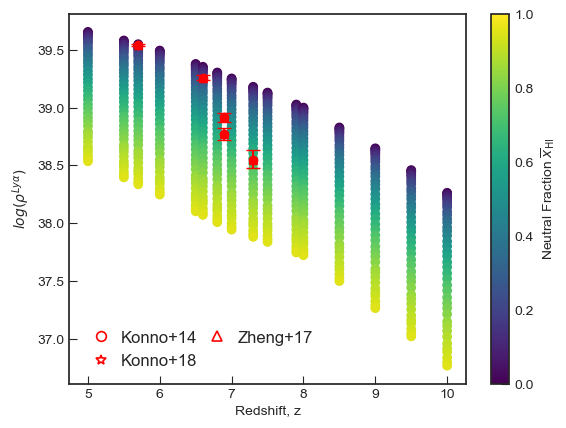

In [88]:
import itertools as it
def dict_to_LDplot(p_dict, p_index=0, p_name=r'$log(\rho^{Ly\alpha})$', cmap='viridis'):
    """
    Input a dictionary with keys (z, xHI) with values p = (alpha, logLstar, logPhistar)
    Plot p(z, xHI) and xHI(z, p) -- requires interpolating.
    """
    
    keys    = np.array([[k[0], k[1]] for k in p_dict.keys()])
    z_all   = keys[:,0]
    xHI_all = keys[:,1]
    
    # find unique z and xHI values
    z_array   = np.unique(z_all)    
    xHI_array = np.unique(xHI_all)
    

    # Get all the values of the parameter (at index) from the dictionary
#     p_values = np.array([v for v in p_dict.values()])[:,p_index]
    p_values = np.array([v for v in p_dict.values()])
    
    # Create a grid of the parameter values
    p_array   = np.linspace(p_values.min(), p_values.max(), 100)   
    

    # We have parameter(z, xHI), want to get xHI(z, p) so we need to interpolate
    # from our current list of all z values, all p values and all xHI values to
    # to the grids we want to plot on
    xHI_interp = scipy.interpolate.interp2d(z_all, p_values, xHI_all, 
                                            kind='linear', fill_value=np.nan)
    
    # interpolate onto the correct z and p grid
    new_xHI = xHI_interp(z_array, p_array)
    
    # correct interpolated values which go to xHI=0 when they shouldn't be
    new_xHI[new_xHI == 0.] = np.nan
    
    #Legend for references
#     markers = ['s', 'o', 'd', '^', '>', 'v', 'p','*','<','D']
    markers = ['o', '*', '^']
    markers_all = np.chararray(len(LD_tab['z']))
    ref_handles = []
    for i, ref in enumerate(np.unique(LD_tab['ref'])):
        refs_select = np.where(LD_tab['ref'] == ref)
        markers_all[refs_select] = markers[i]
        ref_handles.append(mlines.Line2D([], [], color='None', markeredgecolor='red', marker=markers[i],
                              markeredgewidth=1.2, markersize=7, label=ref))
        plt.plot(LD_tab['z'], LD_tab['log(LD)'], marker = markers[i],lw = 0,color = 'red')
   
    plt.errorbar(LD_tab['z'], LD_tab['log(LD)'],yerr=LDyerror, fmt = ' ',capsize=5, color='red')
    plt.scatter(z_all, np.log10(p_values), c=xHI_all, cmap=cmap, vmin=0, vmax=1.)

    leg = plt.legend(handles=ref_handles, loc=('lower left'), fontsize=12,
                 frameon=False, 
                 columnspacing=0.2, handletextpad=0.2, ncol=2)
    plt.gca().add_artist(leg)

    
#     plt.figure(figsize=(4.6,4))
#     plt.errorbar(LD_tab['z'], LD_tab['log(LD)'],yerr=LDyerror, fmt = ' ',capsize=5, color='red')
#     plt.scatter(z_all, np.log10(p_values), c=xHI_all, cmap=cmap, vmin=0, vmax=1.)
    plt.colorbar(label='Neutral Fraction $\overline{x}_\mathrm{HI}$')
    plt.legend()
    plt.xlabel('Redshift, z')
    plt.ylabel(p_name) 
#     plt.savefig('LD.pdf', bbox_inches='tight')
#     plt.show()
    return
dict_to_LDplot(p_dict=LD_dict, p_index=0)

In [196]:
print(np.log10(38.55))
print(10**1.586024)


1.5860243823869757
38.54996605756684


# LF Dictionary for Charlotte

In [13]:
lya_LF70 = LF.make_lya_LF(zval_test = 7.0,xHI_test = 0.01, F=0.666, plot=False, log=True)
lya_LF75 = LF.make_lya_LF(zval_test = 7.5,xHI_test = 0.01, F=0.666, plot=False, log=True)
lya_LF80 = LF.make_lya_LF(zval_test = 8.0,xHI_test = 0.01, F=0.666, plot=False, log=True)
lya_LF85 = LF.make_lya_LF(zval_test = 8.5,xHI_test = 0.01, F=0.666, plot=False, log=True)


In [60]:
LF_dict = {} #luminosity function dictionary
zval_test = np.array([7.0,7.5,8.0,8.5])
xHI_test = np.array([0.01])
for zval in zval_test:
    for xHI in xHI_test:
        LF_plot = LF.make_lya_LF(zval_test = zval,xHI_test = xHI, F=0.666, plot=False, log=True)
        
        LF_dict[(zval,xHI)] = [LF_plot,LF.log10_lg]

LF_dict
np.save('LF_dict.npy',LF_dict)


In [61]:
np.load('LF_dict.npy', allow_pickle = True)

array({(7.0, 0.01): [array([1.30850670e-02, 1.39912568e-02, 1.49597073e-02, 1.59944546e-02,
       1.71001202e-02, 1.82810683e-02, 1.95415376e-02, 2.08864563e-02,
       2.23212415e-02, 2.38512767e-02, 2.54817552e-02, 2.72185111e-02,
       2.90677640e-02, 3.10358372e-02, 3.31288408e-02, 3.53534081e-02,
       3.77164343e-02, 4.02249215e-02, 4.28855532e-02, 4.57053425e-02,
       4.86913425e-02, 5.18505716e-02, 5.51895105e-02, 5.87146426e-02,
       6.24321278e-02, 6.63477251e-02, 7.04662450e-02, 7.47919393e-02,
       7.93281139e-02, 8.40770216e-02, 8.90391770e-02, 9.42135767e-02,
       9.95971864e-02, 1.05184645e-01, 1.10967465e-01, 1.16933900e-01,
       1.23068209e-01, 1.29350102e-01, 1.35753838e-01, 1.42248009e-01,
       1.48795239e-01, 1.55352643e-01, 1.61872988e-01, 1.68307635e-01,
       1.74610509e-01, 1.80742859e-01, 1.86676554e-01, 1.92393257e-01,
       1.97876162e-01, 2.03094028e-01, 2.07982313e-01, 2.12431802e-01,
       2.16294877e-01, 2.19414574e-01, 2.21669218e-01, 2

# Unused/Old Code

## Weighted squared deviation for F, xHI

In [ ]:
def weighted_squared_deviation(F):
    """
    Chi = Konno, Ouchi, Santos ndens values - our ndens values at corresponding Konno lum grid * F / Konno error values
    Compute the weighted squared deviation between the data (same for Ouchi, Santos)
    (x, y, y_err) and the model points computed with the input 
    parameters (F).
    """
    Ko_L, Ko_ndens, yerror_mean = LF.konno_data_plt(zval_test=5.7, plot = False, mean = True) #Defined here rather than as func. parameters
    chi_Ko = (Ko_ndens - line_model(F[:,None], obs_L = Ko_L)) / yerror_mean
    
    Ou_L, Ou_ndens, yerror_mean = LF.ouchi_data_plt(zval_test=5.7, plot = False, mean = True) #Defined here rather than as func. parameters
    chi_Ou = (Ou_ndens - line_model(F[:,None], obs_L = Ou_L)) / yerror_mean
  
 
    return np.sum(chi_Ko**2, axis=1) + np.sum(chi_Ou**2, axis=1)

plt.plot(F, weighted_squared_deviation(F)) #Plot to estimate min. F value

x0 = 0.6 # starting guess for the optimizer 
result_sq = minimize(weighted_squared_deviation, x0=x0,method='BFGS')
best_pars_sq = result_sq.x
print(best_pars_sq)

In [ ]:
#Weighted squared deviation for xHI at z = 6.6, 7.3


def xHI_weighted_squared_deviation(xHI,z = 7.3):
    """
    Chi = Konno, Ouchi, Shibuya ndens values - our ndens values at corresponding Konno, Ouchi, Shibuya lum grid * xHI model WRT xHI, obs. values, z
    Compute the weighted squared deviation between the data 
    (x, y, y_err) and the model points computed with the input 
    parameters (F).
    """
    if type(xHI) == float:
    #print singular value
        if z == 7.3:
            Ko_L, Ko_ndens, yerror = LF.konno_data_plt(zval_test= z, plot = False, mean = False) #Defined here rather than as func. parameters
            xHI_chi_Ko = (Ko_ndens - xHI_model(xHI, obs_L = Ko_L, zval=z)) / yerror
            
            Sh_L, Sh_ndens, yerror = LF.shibuya_data_plt(zval_test= z, plot = False, mean = False) #Defined here rather than as func. parameters
            xHI_chi_Sh = (Sh_ndens - xHI_model(xHI, obs_L = Sh_L, zval=z)) / yerror
            
            return np.sum(xHI_chi_Ko**2) + np.sum(xHI_chi_Sh**2)
        elif z == 6.6:
            
            Ko_L, Ko_ndens, yerror = LF.konno_data_plt(zval_test= z, plot = False, mean = False) #Defined here rather than as func. parameters
            xHI_chi_Ko = (Ko_ndens - xHI_model(xHI, obs_L = Ko_L, zval=z)) / yerror            
            
            Ou_L, Ou_ndens, yerror_mean = LF.ouchi_data_plt(zval_test=z, plot = False, mean = False) #Defined here rather than as func. parameters
            xHI_chi_Ou = (Ou_ndens - xHI_model(xHI, obs_L = Ou_L,zval=z)) / yerror

            
            return np.sum(xHI_chi_Ko**2) + np.sum(xHI_chi_Ou**2)
                   
    else:
        #prints list of values
        chi2=[]
        for x in xHI:
            #Finding nearest neighbor to values in xHI array 

            idx = (np.abs(LF.xHI_list - x)).argmin()
            xHI_grid_match = LF.xHI_list[idx]

            if z == 7.3:
                Ko_L, Ko_ndens, yerror_mean = LF.konno_data_plt(zval_test= z, plot = False) #Defined here rather than as func. parameters
                xHI_chi_Ko = (Ko_ndens - xHI_model(xHI_grid_match, obs_L = Ko_L, zval=z)) / yerror_mean
                
                Sh_L, Sh_ndens, yerror = LF.shibuya_data_plt(zval_test= z, plot = False, mean = False) #Defined here rather than as func. parameters
                xHI_chi_Sh = (Sh_ndens - xHI_model(xHI_grid_match, obs_L = Sh_L, zval=z)) / yerror
                
                chi2.append(np.sum(xHI_chi_Ko**2) + np.sum(xHI_chi_Sh**2))
            elif z == 6.6:
                Ko_L, Ko_ndens, yerror_mean = LF.konno_data_plt(zval_test= z, plot = False) #Defined here rather than as func. parameters
                xHI_chi_Ko = (Ko_ndens - xHI_model(xHI_grid_match, obs_L = Ko_L, zval=z)) / yerror_mean                
                
                Ou_L, Ou_ndens, yerror_mean = LF.ouchi_data_plt(zval_test=z, plot = False) #Defined here rather than as func. parameters
                xHI_chi_Ou = (Ou_ndens - xHI_model(xHI_grid_match, obs_L = Ou_L,zval=z)) / yerror_mean

                
                chi2.append(np.sum(xHI_chi_Ko**2) + np.sum(xHI_chi_Ou**2))

                
        return np.array(chi2)
    

## Minimization of xHI at z = 6.6, 7.0, 7.3

In [ ]:
#Line models used for z = 6.6, 7.0, 7.3

def xHI_model(xHI, obs_L, zval=6.6):
    """
    Evaluate a straight line model at the input Konno luminosity values.
    
    Parameters
    ----------
    F : list, array
        This should be a length-2 array or list containing the 
        parameter values (a, b) for the (slope, intercept).
    new_phi_Li : numeric, list, array
        The coordinate values.
        
    Returns
    -------
    new_phi_Li : array
        The computed y values at each input x.
    """
    #Interpolating Konno and lum grid 
    xHI_LF_calibrate = LF.make_lya_LF(zval_test = zval, xHI_test = xHI, F = 0.667, plot=False,log=True)   
    LF_interp = interpolate.interp1d(LF.log10_lg, xHI_LF_calibrate)
    new_phi_Li = LF_interp(obs_L)
    
    return new_phi_Li

In [217]:
#Chi-squared for z = 6.6
chi2_6 = xHI_weighted_squared_deviation(xHI=LF.xHI_list,z = 6.6)

In [218]:
#Chi-squared for z = 7.3
chi2_7 = xHI_weighted_squared_deviation(xHI=LF.xHI_list,z = 7.3)

[0.04724947]


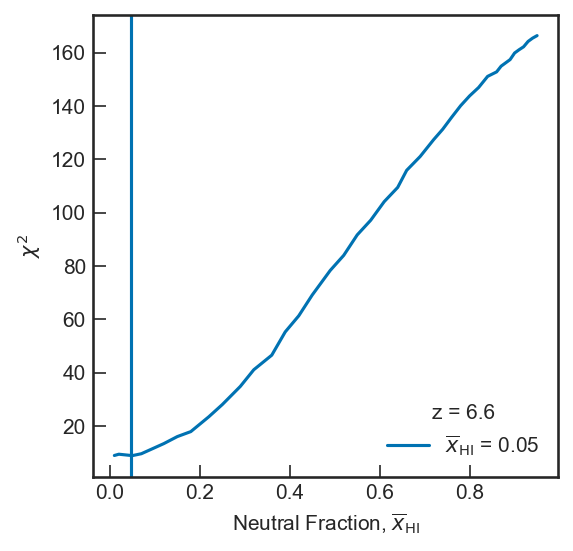

In [221]:
#Minimization of xHI for Z = 6.6
plt.figure(figsize=(4.,4.), dpi=150)
plt.plot(LF.xHI_list, chi2_6) #Plot to estimate min. xHI value
# plt.axvline(0.0143)

 
bounds = [(0,1)]
xHI_result_sq = differential_evolution(xHI_weighted_squared_deviation, bounds=bounds)


xHI_best_pars_sq = xHI_result_sq.x
print(xHI_best_pars_sq)


plt.axvline(xHI_best_pars_sq, label = '$\overline{x}_\mathrm{HI}$ = %.2f' % xHI_best_pars_sq)
plt.ylabel('$\chi^2$')
plt.xlabel('Neutral Fraction, $\overline{x}_\mathrm{HI}$')
plt.legend(title = 'z = 6.6')
# plt.savefig('xHIminimize6.pdf', bbox_inches='tight')
# plt.show()

[0.95698948]


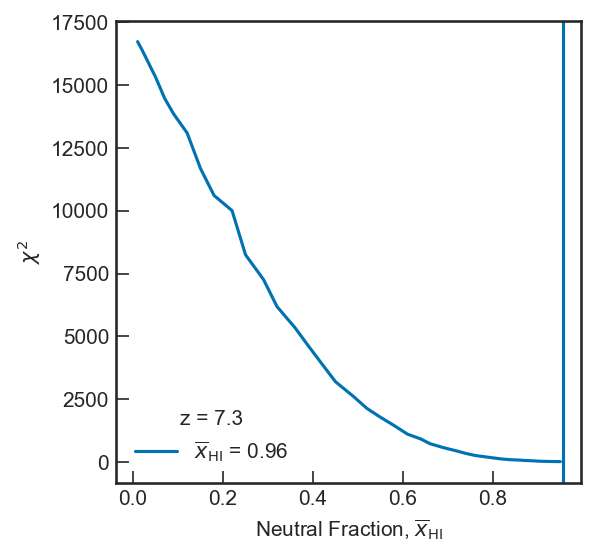

In [224]:
#Minimization of xHI for Z = 7.3
plt.figure(figsize=(4.,4.), dpi=150)
plt.plot(LF.xHI_list, chi2_7) #Plot to estimate min. xHI value
# plt.axvline(0.6831)

bounds = [(0,1)]

xHI_result_sq_2 = differential_evolution(xHI_weighted_squared_deviation, bounds=bounds)

xHI_best_pars_sq_2 = xHI_result_sq_2.x
print(xHI_best_pars_sq_2)

plt.axvline(xHI_best_pars_sq_2, label = '$\overline{x}_\mathrm{HI}$ = %.2f' % xHI_best_pars_sq_2)
plt.ylabel('$\chi^2$')
plt.xlabel('Neutral Fraction, $\overline{x}_\mathrm{HI}$')
plt.legend(title = 'z = 7.3')
# plt.savefig('xHIminimize7.pdf', bbox_inches='tight')
# plt.show()

## Make P(L|Muv)

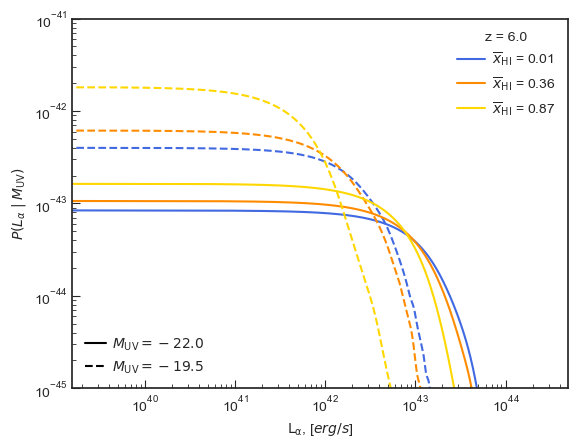

In [90]:
def make_pL(zval_test, xHI_test, legend = True):
    
    Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=zval_test, xHI_test= xHI_test)
    if xHI_test == 0.01: 
        my_color = 'royalblue'
    elif xHI_test == 0.36:
        my_color = 'darkorange'
    elif xHI_test == 0.87:
        my_color = 'gold'
    
    for mm,Muv in enumerate (Muv_grid):
        if Muv == -22.0: #Muv = -22.0
            ls = 'solid'
            label = '$\overline{x}_\mathrm{HI}$ = %.2f' % xHI_test
            plt.loglog(lum_lya[:,mm], norm_pLya[:,mm], ls=ls, color = my_color, label = label)
            line2 = mlines.Line2D([], [], color='k', label=r'$M_\mathrm{UV} = %.1f$' % Muv_grid[mm])
           
        elif Muv == -19.5: #Muv = -19.5 (will not show on xHI legend)
            ls = 'dashed'
            label = None
            plt.loglog(lum_lya[:,mm], norm_pLya[:,mm], ls=ls, color = my_color, label = label)
            line3 = mlines.Line2D([], [], color='k', ls='dashed', label=r'$M_\mathrm{UV} = %.1f$' % Muv_grid[mm])
            
    if legend == True:
        leg_zval = plt.legend(title = 'z = %.1f' % zval_test,frameon=False,loc = 'upper right', handletextpad=0.5)
        plt.gca().add_artist(leg_zval)

    #This is the legend for Muv values, -22.0 is solid, -19.5 is dashed

    plt.legend(handles=[ line2, line3], loc='lower left', frameon=False, handletextpad=0.5, handlelength=1.5)
    plt.xlabel(r'${\mathrm{L_\alpha}}$, [$erg/s$]')
    plt.ylabel(r'${ P (L_\alpha \;|\; M_\mathrm{UV})}$')
    plt.ylim(1e-45,1e-41)
#     plt.xlim(1e35,1e45)
    return

make_pL(zval_test=6.0, xHI_test=0.01, legend = False)
make_pL(zval_test=6.0, xHI_test=0.36, legend = False)
make_pL(zval_test=6.0, xHI_test=0.87, legend = True)

plt.savefig('LvsPLya.pdf', bbox_inches='tight')
plt.show()


In [93]:
Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.0, xHI_test= 0.01)
pLya_dict = {} #luminosity function dictionary

for Muv in enumerate (Muv_grid):
    if Muv == -22.0:
        print(norm_pLya[Muv == -22.0])
pLya_dict[(6.0,0.01)] = [Muv_grid,norm_pLya]

pLya_dict
np.save('pLya_dict.npy',pLya_dict)

In [91]:
np.load('pLya_dict.npy', allow_pickle = True)

array({(6.0, 0.01): [array([-24. , -23.9, -23.8, -23.7, -23.6, -23.5, -23.4, -23.3, -23.2,
       -23.1, -23. , -22.9, -22.8, -22.7, -22.6, -22.5, -22.4, -22.3,
       -22.2, -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5, -21.4,
       -21.3, -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6, -20.5,
       -20.4, -20.3, -20.2, -20.1, -20. , -19.9, -19.8, -19.7, -19.6,
       -19.5, -19.4, -19.3, -19.2, -19.1, -19. , -18.9, -18.8, -18.7,
       -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18. , -17.9, -17.8,
       -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17. , -16.9,
       -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16. ,
       -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1,
       -15. , -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2,
       -14.1, -14. , -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3,
       -13.2, -13.1, -13. , -12.9, -12.8, -12.7, -12.6, -12.5, -12.4,
       -12.3, -12.2, -12.1]), <Quantity [[2.32886027e-043, 2.55354451

       Muv           pLya         L_Lya
0    -22.0   1.475539e-42  0.000000e+00
1    -22.0   8.376915e-44  2.787819e+40
2    -22.0   8.376901e-44  2.790388e+40
3    -22.0   8.376887e-44  2.792959e+40
4    -22.0   8.376873e-44  2.795533e+40
...    ...            ...           ...
9995 -22.0  2.121979e-305  2.775009e+44
9996 -22.0  4.342447e-306  2.777566e+44
9997 -22.0  8.854664e-307  2.780126e+44
9998 -22.0  1.799081e-307  2.782688e+44
9999 -22.0  3.642228e-308  2.785252e+44

[10000 rows x 3 columns]
       Muv          pLya         L_Lya
0    -19.5  5.948947e-42  0.000000e+00
1    -19.5  3.994996e-43  2.787819e+39
2    -19.5  3.994994e-43  2.790388e+39
3    -19.5  3.994991e-43  2.792959e+39
4    -19.5  3.994988e-43  2.795533e+39
...    ...           ...           ...
9995 -19.5  9.727205e-66  2.775009e+43
9996 -19.5  6.319449e-66  2.777566e+43
9997 -19.5  4.095217e-66  2.780126e+43
9998 -19.5  2.647148e-66  2.782688e+43
9999 -19.5  1.706793e-66  2.785252e+43

[10000 rows x 3 columns]


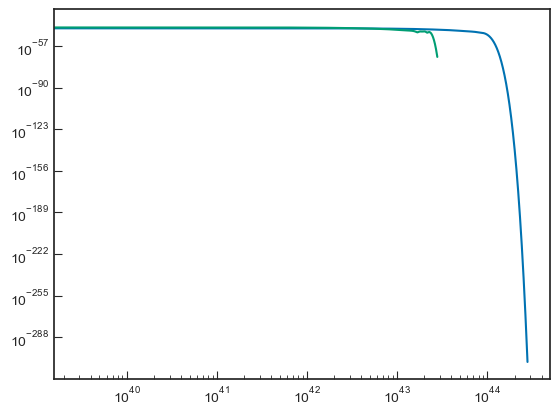

In [129]:
Muv_grid, new_pLya, norm_pLya, lum_lya = LF.make_pL_Lya(zval_test=6.0, xHI_test= 0.01)
for mm,Muv in enumerate (Muv_grid):
    if Muv == -22.0:

        df22 = pd.DataFrame({'Muv': Muv, 'pLya': norm_pLya[:,mm], 'L_Lya': lum_lya[:,mm]})
        print(df22)
        np.savetxt('pLya_22.txt', df22.values, delimiter=" ", header="Muv pLya L_Lya")  

        plt.loglog(lum_lya[:,mm], norm_pLya[:,mm])
    elif Muv == -19.5:
        df19 = pd.DataFrame({'Muv': Muv, 'pLya': norm_pLya[:,mm], 'L_Lya': lum_lya[:,mm]})
        print(df19)
        np.savetxt('pLya_195.txt', df19.values, delimiter=" ", header="Muv pLya L_Lya")  

        plt.loglog(lum_lya[:,mm], norm_pLya[:,mm])

     